In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
pd.options.display.max_rows = 10

In [3]:
db = json.load(open('/Users/helena/Downloads/pydata-notebook-master/datasets/usda_food/database.json'))
print(len(db))

6636


In [4]:
print(db[0].keys())

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])


In [5]:
print(db[0]['nutrients'][0])

{'value': 25.18, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}


In [6]:
nutrients = pd.DataFrame(db[0]['nutrients'])
print(nutrients)

                            description        group units    value
0                               Protein  Composition     g   25.180
1                     Total lipid (fat)  Composition     g   29.200
2           Carbohydrate, by difference  Composition     g    3.060
3                                   Ash        Other     g    3.280
4                                Energy       Energy  kcal  376.000
..                                  ...          ...   ...      ...
157                              Serine  Amino Acids     g    1.472
158                         Cholesterol        Other    mg   93.000
159        Fatty acids, total saturated        Other     g   18.584
160  Fatty acids, total monounsaturated        Other     g    8.275
161  Fatty acids, total polyunsaturated        Other     g    0.830

[162 rows x 4 columns]


In [12]:
info_keys = ['description','group','id','manufacturer']
info = pd.DataFrame(db, columns = info_keys)
print(info[:5])

                          description                   group    id  \
0                     Cheese, caraway  Dairy and Egg Products  1008   
1                     Cheese, cheddar  Dairy and Egg Products  1009   
2                        Cheese, edam  Dairy and Egg Products  1018   
3                        Cheese, feta  Dairy and Egg Products  1019   
4  Cheese, mozzarella, part skim milk  Dairy and Egg Products  1028   

  manufacturer  
0               
1               
2               
3               
4               


In [11]:
print(type(info))
info.fillna(0)

<class 'pandas.core.frame.DataFrame'>


,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,0
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,0


In [14]:
nutrients_all = pd.DataFrame()

for food in db:
    nutrients = pd.DataFrame(food['nutrients'])
    nutrients['id'] = food['id']
    nutrients_all = nutrients_all.append(nutrients, ignore_index = True)

In [15]:
print(nutrients_all)

                               description        group units    value     id
0                                  Protein  Composition     g   25.180   1008
1                        Total lipid (fat)  Composition     g   29.200   1008
2              Carbohydrate, by difference  Composition     g    3.060   1008
3                                      Ash        Other     g    3.280   1008
4                                   Energy       Energy  kcal  376.000   1008
...                                    ...          ...   ...      ...    ...
389350                 Vitamin B-12, added     Vitamins   mcg    0.000  43546
389351                         Cholesterol        Other    mg    0.000  43546
389352        Fatty acids, total saturated        Other     g    0.072  43546
389353  Fatty acids, total monounsaturated        Other     g    0.028  43546
389354  Fatty acids, total polyunsaturated        Other     g    0.041  43546

[389355 rows x 5 columns]


In [16]:
nutrients_all.duplicated().sum()

14179

In [19]:
nutrients_all = nutrients_all.drop_duplicates()
nutrients_all

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
389350,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
389351,Cholesterol,Other,mg,0.000,43546
389352,"Fatty acids, total saturated",Other,g,0.072,43546
389353,"Fatty acids, total monounsaturated",Other,g,0.028,43546


In [20]:
col_mapping = {'description':'food','group':'fgroup'}
info = info.rename(columns = col_mapping, copy = False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [21]:
col_mapping = {'description':'nutrient','group':'nutgroup'}
nutrients_all = nutrients_all.rename(columns = col_mapping, copy = False)
nutrients_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
nutrient    375176 non-null object
nutgroup    375176 non-null object
units       375176 non-null object
value       375176 non-null float64
id          375176 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB


In [22]:
ndata = pd.merge(nutrients_all, info, on = 'id', how = 'outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [23]:
ndata.iloc[3000]

nutrient                 Alcohol, ethyl
nutgroup                          Other
units                                 g
value                                 0
id                                 1159
food            Cheese, goat, soft type
fgroup           Dairy and Egg Products
manufacturer                           
Name: 3000, dtype: object

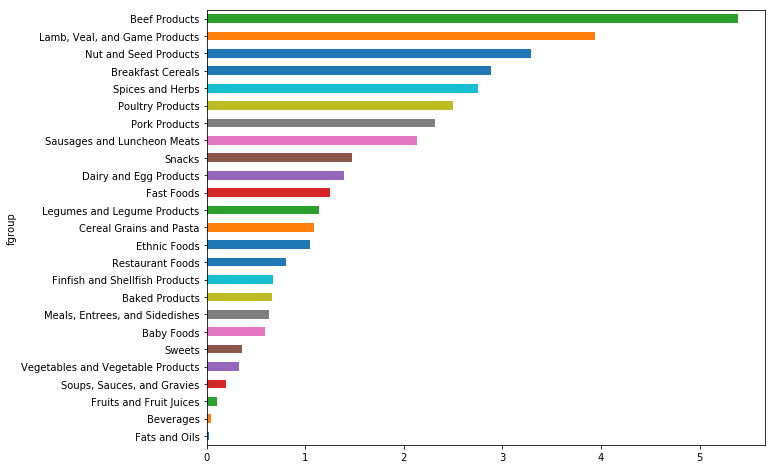

In [25]:
result = ndata.groupby(['nutrient','fgroup']).value.quantile(0.5)
import matplotlib.pyplot as plt
result['Zinc, Zn'].sort_values().plot(kind = 'barh', figsize = (10,8))
plt.show()

In [26]:
by_nutrient = ndata.groupby(['nutgroup','nutrient'])
get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]
max_foods = by_nutrient.apply(get_maximum)[['value','food']]
max_foods.food = max_foods.food.str[:50]
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object